In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import GridSearchCV,KFold,train_test_split
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn import metrics
%matplotlib inline 

In [15]:
df = pd.read_csv('../../../../datasets/parte1/dataset_cleaned.csv')

In [16]:
X = df.drop(['MaxTemp'], axis=1)
y = df['MaxTemp']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [18]:
%pip install tensorflow
%pip install–upgrade keras
%pip install scikeras[tensorflow]

Note: you may need to restart the kernel to use updated packages.
ERROR: unknown command "install–upgrade" - maybe you meant "install"
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [19]:
def build_model(activation = 'relu', learning_rate = 0.01):
    model = Sequential()
    model.add(Dense(16,input_dim = 20, activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(1, activation = activation)) # output 

    #Compile the model 
    model.compile(
        loss = 'mae',
        optimizer  = tf.optimizers.Adam(learning_rate),
        metrics = ['mae', 'mse'])
    return model 
    

In [20]:
model = build_model()
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 16)                336       
                                                                 
 dense_49 (Dense)            (None, 8)                 136       
                                                                 
 dense_50 (Dense)            (None, 1)                 9         
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [21]:
optimizer = ['SGD','RMSprop','Adagrad']
param_grid = dict(optimizer = optimizer)


In [22]:
kf = KFold(n_splits = 5 , shuffle= True , random_state=2023)

In [23]:
model = KerasRegressor(model = build_model, batch_size=32, validation_split=0.2, epochs = 20)

In [24]:
grid_search = GridSearchCV(estimator = model, param_grid= param_grid, cv = kf, scoring = 'neg_mean_absolute_error',refit='True',verbose = 1)

In [25]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


Epoch 1/20
1732/1732 [==============================] - 5s 2ms/step - loss: 23.5164 - mae: 23.5164 - mse: 605.0735 - val_loss: 23.4014 - val_mae: 23.4014 - val_mse: 598.7222
Epoch 2/20
1732/1732 [==============================] - 4s 2ms/step - loss: 23.5164 - mae: 23.5164 - mse: 605.0728 - val_loss: 23.4014 - val_mae: 23.4014 - val_mse: 598.7222
Epoch 3/20
1732/1732 [==============================] - 4s 2ms/step - loss: 23.5164 - mae: 23.5164 - mse: 605.0735 - val_loss: 23.4014 - val_mae: 23.4014 - val_mse: 598.7222
Epoch 4/20
1732/1732 [==============================] - 4s 2ms/step - loss: 23.5164 - mae: 23.5164 - mse: 605.0737 - val_loss: 23.4014 - val_mae: 23.4014 - val_mse: 598.7222
Epoch 5/20
1732/1732 [==============================] - 4s 2ms/step - loss: 23.5164 - mae: 23.5164 - mse: 605.0738 - val_loss: 23.4014 - val_mae: 23.4014 - val_mse: 598.7222
Epoch 6/20
1732/1732 [==============================] - 4s 2ms/step - loss: 23.5164 - mae: 23.5164 - mse: 605.0739 - val_loss: 23.

GridSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=KerasRegressor(batch_size=32, epochs=20, model=<function build_model at 0x7f9ae384c820>, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             refit='True', scoring='neg_mean_absolute_error', verbose=1)

In [26]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: -18.934600 using {'optimizer': 'RMSprop'}


In [27]:
best_mlp_model = grid_search.best_estimator_
print(best_mlp_model)

KerasRegressor(
	model=<function build_model at 0x7f9ae384c820>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)


In [28]:
best_mlp_model.fit(X_train,y_train, epochs = 20, validation_data = (X_test,y_test),verbose = 1)

Epoch 1/20
2707/2707 [==============================] - 9s 3ms/step - loss: 23.4823 - mae: 23.4823 - mse: 603.3097 - val_loss: 23.4628 - val_mae: 23.4628 - val_mse: 602.2482
Epoch 2/20
2707/2707 [==============================] - 7s 2ms/step - loss: 23.4823 - mae: 23.4823 - mse: 603.3094 - val_loss: 23.4628 - val_mae: 23.4628 - val_mse: 602.2482
Epoch 3/20
2707/2707 [==============================] - 7s 3ms/step - loss: 23.4823 - mae: 23.4823 - mse: 603.3096 - val_loss: 23.4628 - val_mae: 23.4628 - val_mse: 602.2482
Epoch 4/20
2707/2707 [==============================] - 7s 3ms/step - loss: 23.4823 - mae: 23.4823 - mse: 603.3094 - val_loss: 23.4628 - val_mae: 23.4628 - val_mse: 602.2482
Epoch 5/20
2707/2707 [==============================] - 7s 3ms/step - loss: 23.4823 - mae: 23.4823 - mse: 603.3095 - val_loss: 23.4628 - val_mae: 23.4628 - val_mse: 602.2482
Epoch 6/20
2707/2707 [==============================] - 7s 3ms/step - loss: 23.4823 - mae: 23.4823 - mse: 603.3104 - val_loss: 23.

KerasRegressor(
	model=<function build_model at 0x7f9ae384c820>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)

In [29]:
predictions = best_mlp_model.predict(X_test)


1160/1160 [==============================] - 2s 2ms/step


In [30]:
print('R2:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R2: -10.623558566804412
MAE: 23.462823348171423
MSE: 602.2482792355121
RMSE: 24.54074732430763


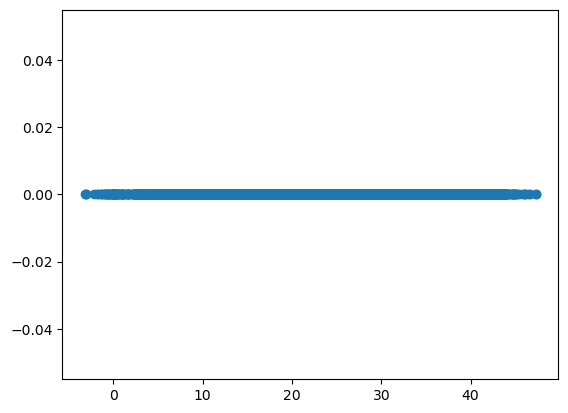

In [31]:
plt.scatter(y_test, predictions)

<Axes: xlabel='MaxTemp', ylabel='Count'>

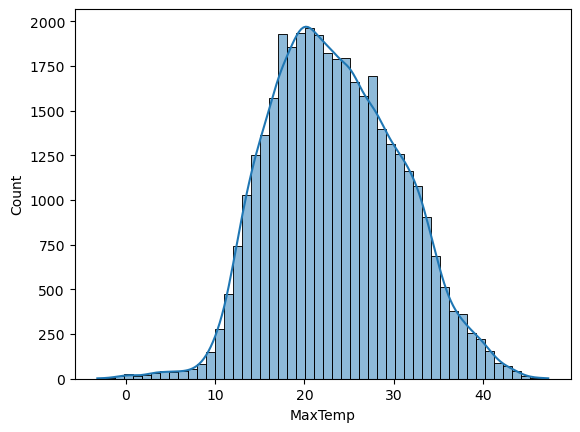

In [32]:
sns.histplot((y_test-predictions), bins=50, kde=True)

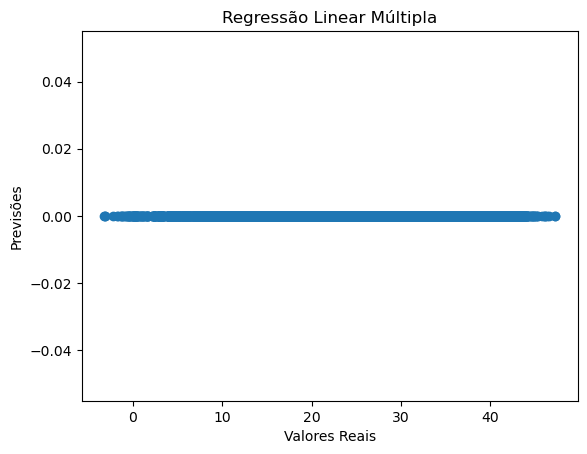

In [33]:
plt.scatter(y_test, predictions)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Regressão Linear Múltipla')
plt.show()